In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets with a specified encoding
verra_df = pd.read_csv('GSF.csv', encoding='latin1')  # Try 'latin1' or 'ISO-8859-1'
gold_standard_df = pd.read_csv('gold.csv', encoding='latin1')  # Try 'latin1' or 'ISO-8859-1'

# Display the first few rows to confirm
print(verra_df.head())
print(gold_standard_df.head())


   Vintage Credit Status  Quantity   GSID  \
0     2022       Retired       188  11074   
1     2022       Retired        58  11074   
2     2022       Retired       368  11074   
3     2022       Retired      8017  11074   
4     2022       Retired      1000  11074   

                                        Project Name Project Developer  \
0  GS1340 Efficient cookstoves in Burkina Faso - ...         Tiipaalga   
1  GS1340 Efficient cookstoves in Burkina Faso - ...         Tiipaalga   
2  GS1340 Efficient cookstoves in Burkina Faso - ...         Tiipaalga   
3  GS1340 Efficient cookstoves in Burkina Faso - ...         Tiipaalga   
4  GS1340 Efficient cookstoves in Burkina Faso - ...         Tiipaalga   

        Country Product Type                  Project Type  \
0  Burkina Faso          VER  Energy Efficiency - Domestic   
1  Burkina Faso          VER  Energy Efficiency - Domestic   
2  Burkina Faso          VER  Energy Efficiency - Domestic   
3  Burkina Faso          VER  Energy

In [2]:

# Define a function to clean and standardize datasets
def clean_and_standardize(df, columns_mapping):
    # Rename columns
    df.rename(columns=columns_mapping, inplace=True)

    # Convert columns to appropriate types
    if 'Quantity' in df.columns:
        df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce').fillna(0)

    if 'Vintage' in df.columns:
        df['Vintage'] = pd.to_datetime(df['Vintage'], errors='coerce').dt.year

    # Standardize the 'Country' column if it exists
    if 'Country' in df.columns:
        df['Country'] = df['Country'].str.upper()

    # Remove duplicates
    df.drop_duplicates(inplace=True)

    return df

# Define column mappings for standardization
verra_columns_mapping = {
    'Vintage': 'Vintage',
    'Credit Status': 'Credit Status',
    'Quantity': 'Credits_Issued',
    'GSID': 'Project_ID',
    'Project Name': 'Project_Name',
    'Project Developer': 'Project_Developer',
    'Country': 'Country',
    'Product Type': 'Product_Type',
    'Project Type': 'Project_Type',
    'Methodology': 'Methodology',
    'Issuance Date': 'Issuance_Date',
    'Retirement Date': 'Retirement_Date',
    'Monitoring Period Start': 'Monitoring_Period_Start',
    'Monitoring Period End': 'Monitoring_Period_End',
    'Serial Number': 'Serial_Number',
    'Note': 'Note',
    'Eligible for CORSIA?': 'Eligible_for_CORSIA',
    'Retired for CORSIA?': 'Retired_for_CORSIA',
    'CORSIA Authorisation': 'CORSIA_Authorisation',
    'Aeroplane Operator Name': 'Aeroplane_Operator_Name'
}

gold_standard_columns_mapping = {
    'Vintage': 'Vintage',
    'Credit Status': 'Credit Status',
    'Quantity': 'Credits_Issued',
    'GSID': 'Project_ID',
    'Project Name': 'Project_Name',
    'Project Developer': 'Project_Developer',
    'Country': 'Country',
    'Product Type': 'Product_Type',
    'Project Type': 'Project_Type',
    'Methodology': 'Methodology',
    'Issuance Date': 'Issuance_Date',
    'Monitoring Period Start': 'Monitoring_Period_Start',
    'Monitoring Period End': 'Monitoring_Period_End',
    'Serial Number': 'Serial_Number',
    'Eligible for CORSIA?': 'Eligible_for_CORSIA',
    'Retired for CORSIA?': 'Retired_for_CORSIA',
    'CORSIA Authorisation': 'CORSIA_Authorisation',
    'Aeroplane Operator Name': 'Aeroplane_Operator_Name'
}

apx_reserve_columns_mapping = {
    'Vintage': 'Vintage',
    'Credit Status': 'Credit Status',
    'Quantity': 'Credits_Issued',
    'Project ID': 'Project_ID',
    'Project Name': 'Project_Name',
    'Project Developer': 'Project_Developer',
    'Country': 'Country',
    'Project Type': 'Project_Type',
    'Methodology': 'Methodology',
    'Issuance Date': 'Issuance_Date',
    'Monitoring Period Start': 'Monitoring_Period_Start',
    'Monitoring Period End': 'Monitoring_Period_End',
    'Serial Number': 'Serial_Number',
    'Additional Certification(s)': 'Additional_Certifications',
    'SDG Impact': 'SDG_Impact',
    'Project Notes': 'Project_Notes',
    'Total Number of Offset Credits Registered': 'Total_Credits_Registered',
    'Project Listed Date': 'Project_Listed_Date',
    'Project Registered Date': 'Project_Registered_Date',
    'Project Website': 'Project_Website'
}

# Apply cleaning and standardization
verra_df = clean_and_standardize(verra_df, verra_columns_mapping)
gold_standard_df = clean_and_standardize(gold_standard_df, gold_standard_columns_mapping)

# Combine datasets
combined_df = pd.concat([verra_df, gold_standard_df]).drop_duplicates()

# Save the unified dataset
combined_df.to_csv('unified_carbon_projects.csv', index=False)

# Display the first few rows of the combined dataset
print(combined_df.head())


   Vintage Credit Status  Credits_Issued  Project_ID  \
0     1970       Retired             188       11074   
1     1970       Retired              58       11074   
2     1970       Retired             368       11074   
3     1970       Retired            8017       11074   
4     1970       Retired            1000       11074   

                                        Project_Name Project_Developer  \
0  GS1340 Efficient cookstoves in Burkina Faso - ...         Tiipaalga   
1  GS1340 Efficient cookstoves in Burkina Faso - ...         Tiipaalga   
2  GS1340 Efficient cookstoves in Burkina Faso - ...         Tiipaalga   
3  GS1340 Efficient cookstoves in Burkina Faso - ...         Tiipaalga   
4  GS1340 Efficient cookstoves in Burkina Faso - ...         Tiipaalga   

        Country Product_Type                  Project_Type  \
0  BURKINA FASO          VER  Energy Efficiency - Domestic   
1  BURKINA FASO          VER  Energy Efficiency - Domestic   
2  BURKINA FASO          VER  En

In [3]:
# Total issuances and retirements per year
annual_summary = combined_df.groupby('Vintage').agg({
    'Credits_Issued': 'sum'
}).reset_index()

# Display the results
print(annual_summary)

   Vintage  Credits_Issued
0     1970       544940266


In [4]:
# Top project types by issuance volume
top_project_types = combined_df.groupby('Project_Type').agg({
    'Credits_Issued': 'sum'
}).sort_values(by='Credits_Issued', ascending=False).reset_index()

print("\nTop Project Types:")
print(top_project_types)


Top Project Types:
                                Project_Type  Credits_Issued
0               Energy Efficiency - Domestic       182272562
1                                       Wind       156276345
2                Solar Thermal - Electricity        38989023
3                                      Other        38104726
4                              Biogas - Heat        35172401
5                       Biogas - Electricity        25959053
6                                        A/R        16204622
7                       Solar Thermal - Heat        10911579
8                  Small, Low - Impact Hydro         7721314
9                                 Geothermal         7583238
10  Biomass, or Liquid Biofuel - Electricity         7263473
11            Energy Efficiency - Industrial         6119575
12         Energy Efficiency - Public Sector         5040746
13                     Biogas - Cogeneration         3326763
14         Biomass, or Liquid Biofuel - Heat         2995544
15  

In [5]:
# Geographical distribution of projects
geographical_distribution = combined_df['Country'].value_counts().reset_index()
geographical_distribution.columns = ['Country', 'Number_of_Projects']

# Display results


print("\nGeographical Distribution:")
print(geographical_distribution)



Geographical Distribution:
             Country  Number_of_Projects
0              INDIA               26076
1             TURKEY               17590
2              CHINA                9232
3             RWANDA                7271
4              KENYA                7019
..               ...                 ...
76           GERMANY                   5
77  PAPUA NEW GUINEA                   4
78         ARGENTINA                   3
79           NAMIBIA                   2
80         MAURITIUS                   2

[81 rows x 2 columns]


In [6]:


# Load the unified dataset
combined_df = pd.read_csv('unified_carbon_projects.csv')

# Ensure the 'Credits_Issued' column is numeric
combined_df['Credits_Issued'] = pd.to_numeric(combined_df['Credits_Issued'], errors='coerce').fillna(0)

# Filter out countries with non-zero credits issued
non_zero_countries_df = combined_df[combined_df['Credits_Issued'] > 0]

# Aggregated data for non-zero countries
geographical_distribution = non_zero_countries_df['Country'].value_counts().reset_index()
geographical_distribution.columns = ['Country', 'Number_of_Projects']

# Additional aggregate analysis for non-zero countries
annual_summary = non_zero_countries_df.groupby('Vintage').agg({
    'Credits_Issued': 'sum'
}).reset_index()

top_project_types = non_zero_countries_df.groupby('Project_Type').agg({
    'Credits_Issued': 'sum'
}).sort_values(by='Credits_Issued', ascending=False).reset_index()

# Display results
print("Annual Summary for Non-Zero Data Countries:")
print(annual_summary)
print("\nTop Project Types by Issuance Volume (Non-Zero Data Countries):")
print(top_project_types)
print("\nGeographical Distribution (Non-Zero Data Countries):")
print(geographical_distribution)




C:\Users\User\AppData\Local\Temp\ipykernel_21656\804152933.py:2: DtypeWarning: Columns (13,17) have mixed types. Specify dtype option on import or set low_memory=False.
  combined_df = pd.read_csv('unified_carbon_projects.csv')


Annual Summary for Non-Zero Data Countries:
   Vintage  Credits_Issued
0     1970       544940266

Top Project Types by Issuance Volume (Non-Zero Data Countries):
                                Project_Type  Credits_Issued
0               Energy Efficiency - Domestic       182272562
1                                       Wind       156276345
2                Solar Thermal - Electricity        38989023
3                                      Other        38104726
4                              Biogas - Heat        35172401
5                       Biogas - Electricity        25959053
6                                        A/R        16204622
7                       Solar Thermal - Heat        10911579
8                  Small, Low - Impact Hydro         7721314
9                                 Geothermal         7583238
10  Biomass, or Liquid Biofuel - Electricity         7263473
11            Energy Efficiency - Industrial         6119575
12         Energy Efficiency - Public Sector

C:\Users\User\AppData\Local\Temp\ipykernel_21656\1018794500.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Credits_Issued', y='Project_Type', data=top_project_types, palette='viridis')


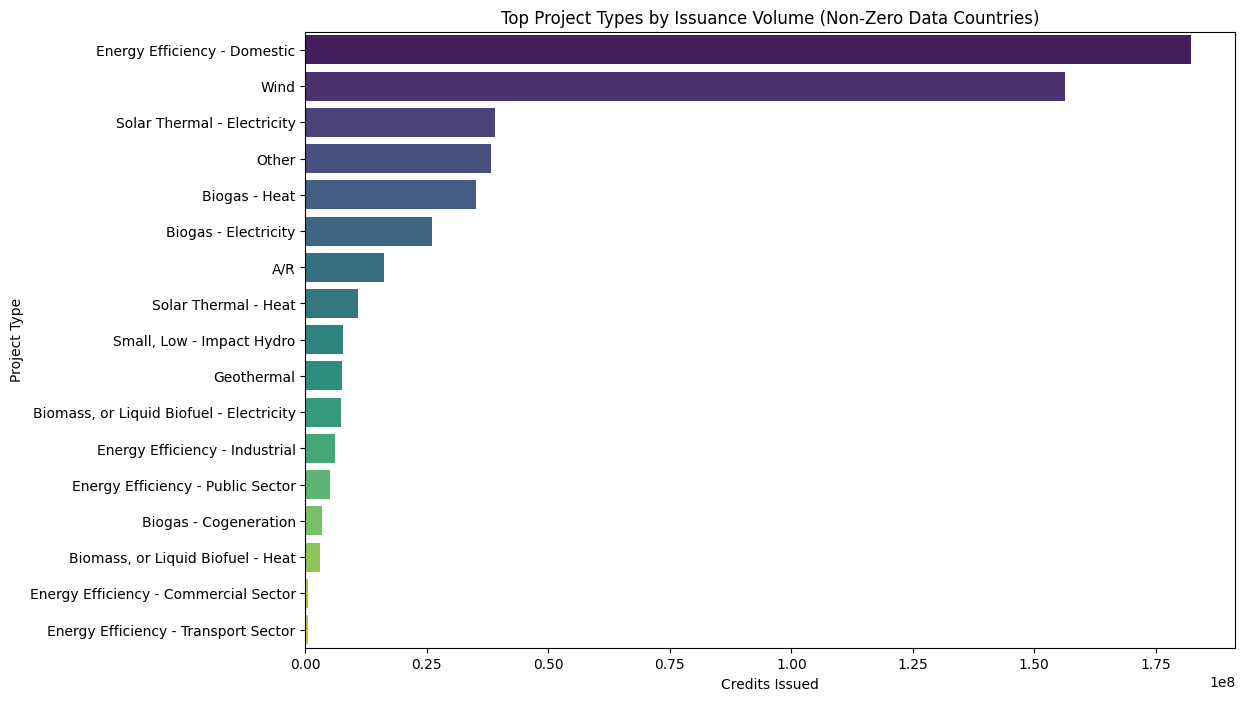

C:\Users\User\AppData\Local\Temp\ipykernel_21656\1018794500.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Number_of_Projects', y='Country', data=geographical_distribution, palette='magma')


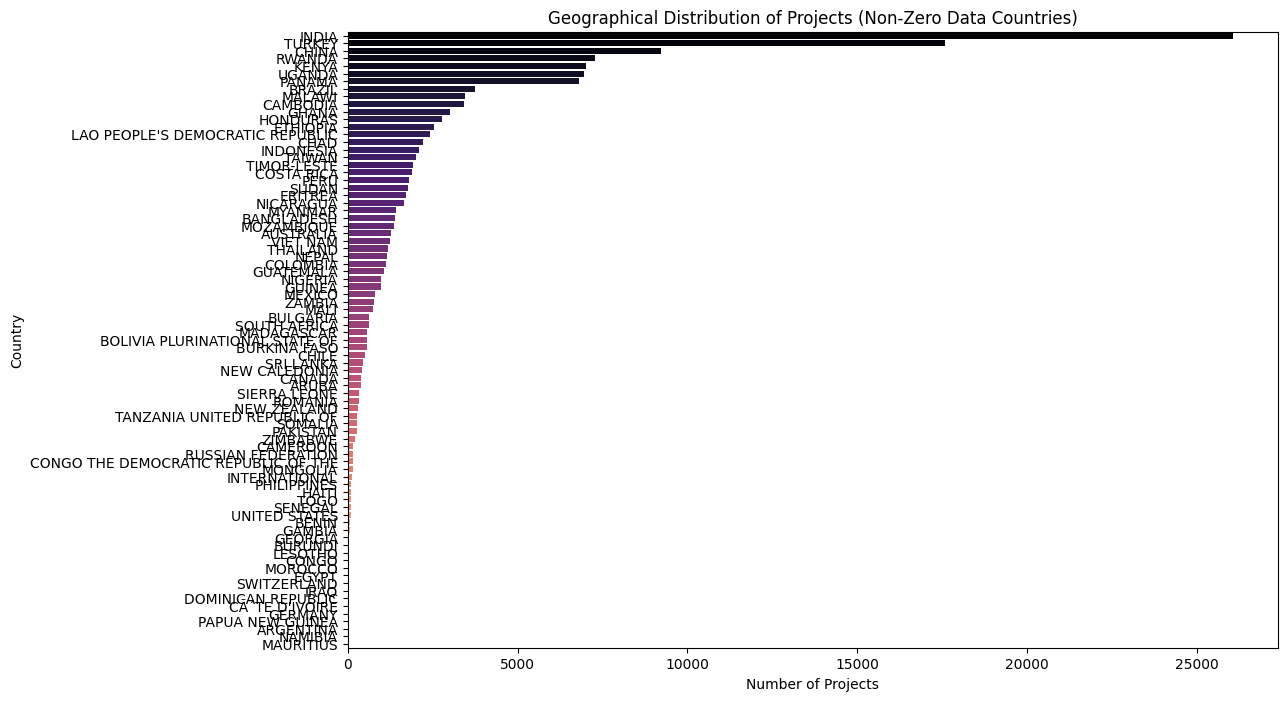

In [7]:
# Visualization



# Top Project Types by Issuance Volume
plt.figure(figsize=(12, 8))
sns.barplot(x='Credits_Issued', y='Project_Type', data=top_project_types, palette='viridis')
plt.title('Top Project Types by Issuance Volume (Non-Zero Data Countries)')
plt.xlabel('Credits Issued')
plt.ylabel('Project Type')
plt.show()

# Geographical Distribution of Projects
plt.figure(figsize=(12, 8))
sns.barplot(x='Number_of_Projects', y='Country', data=geographical_distribution, palette='magma')
plt.title('Geographical Distribution of Projects (Non-Zero Data Countries)')
plt.xlabel('Number of Projects')
plt.ylabel('Country')
plt.show()

In [8]:
print(combined_df.columns)


Index(['Vintage', 'Credit Status', 'Credits_Issued', 'Project_ID',
       'Project_Name', 'Project_Developer', 'Country', 'Product_Type',
       'Project_Type', 'Methodology', 'Programme of Activities', 'POA GSID',
       'Issuance_Date', 'Retirement_Date', 'Monitoring_Period_Start',
       'Monitoring_Period_End', 'Serial_Number', 'Note', 'Eligible_for_CORSIA',
       'Retired_for_CORSIA', 'CORSIA_Authorisation',
       'Aeroplane_Operator_Name'],
      dtype='object')


In [9]:
# Grouping by Project Developer and taking the first occurrence of additional fields
developer_credits = combined_df.groupby('Project_Developer').agg({
    'Vintage': 'first',
    'Credit Status': 'first',
    'Credits_Issued': 'sum',
    'Project_ID': 'first',
    'Project_Name': 'first',
    'Country': 'first',
    'Project_Type': 'first',
    'Retirement_Date': 'first',
}).reset_index()

# Sorting the developers based on total Credits Issued
top_developers = developer_credits.sort_values(by='Credits_Issued', ascending=False).head(30)

print(top_developers)
top_developers.to_csv('TOP_DEVELOPER.csv', index=False)

                                     Project_Developer  Vintage Credit Status  \
154                                      Impact Carbon     1970       Retired   
255            South Pole Carbon Asset Management Ltd.     1970       Retired   
56                                   CO2balance UK ltd     1970       Retired   
290                           YeÅil Global Enerji A.S     1970       Retired   
212                     Orange Renewable Power Pvt Ltd     1970       Retired   
223  Profit Carbon Environmental Energy Technology ...     1970       Retired   
61                                    Cagla Balci Eris     1970       Retired   
296                               myclimate Foundation     1970       Retired   
232                               Relief International     1970       Retired   
153   ITC Invest Trading & Consulting AG Ankara Branch     1970       Retired   
279                      Vestergaard Frandsen Group SA     1970       Retired   
284                         

In [10]:
# Convert 'Retirement_Date' to datetime, errors='coerce' will turn invalid parsing into NaT
combined_df['Retirement_Date'] = pd.to_datetime(combined_df['Retirement_Date'], errors='coerce')


C:\Users\User\AppData\Local\Temp\ipykernel_21656\648825164.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  combined_df['Retirement_Date'] = pd.to_datetime(combined_df['Retirement_Date'], errors='coerce')


In [11]:
buyer_analysis = combined_df.groupby('Note').agg({
    'Credits_Issued': 'sum',  # Sum of credits retired
    'Product_Type': lambda x: ', '.join(x.unique()),  # Types of credits retired
    'Retirement_Date': lambda x: ', '.join(x.dropna().dt.year.astype(str).unique())  # Years of retirement
}).reset_index()

# Renaming columns for clarity
buyer_analysis.rename(columns={
    'Note': 'Buyer_Name',
    'Credits_Issued': 'Total_Credits_Retired',
    'Product_Type': 'Types_of_Credits_Retired',
    'Retirement_Date': 'Years_of_Retirement'
}, inplace=True)

# Sorting buyers by Total Credits Retired
buyer_analysis = buyer_analysis.sort_values(by='Total_Credits_Retired', ascending=False)

# Save to CSV
buyer_analysis.to_csv('Carbon_Credit_Buyers.csv', index=False)


In [12]:
print(buyer_analysis.head())


                                              Buyer_Name  \
45308                                  Retired for Shell   
37926  Retired by Gold Standard to compensate for pot...   
48091        Retired on behalf of Lidl Stiftung & Co. KG   
2616   Certificate 20/106 & 20/190 & 20/302 - Offset ...   
1934                         CMB - FY2021 - Scopes 1 & 2   

       Total_Credits_Retired Types_of_Credits_Retired Years_of_Retirement  
45308                1208443                      VER          2024, 2023  
37926                1000000                      VER                2021  
48091                 802133                      VER                2024  
2616                  710534                      VER                2021  
1934                  685200                      VER                2022  


Brief Analysis of the Top Carbon Credit Buyers and Notable Trends
1. Dominance of Corporate Buyers
The top buyers in the dataset include large corporations such as Shell, Lidl Stiftung & Co. KG, and others who are actively involved in voluntary carbon markets to offset their emissions.
Shell stands out as one of the leading buyers, retiring over 1.2 million credits, indicating its significant commitment to offsetting its carbon footprint.
2. Preference for Verified Emission Reductions (VER)
All top buyers in the dataset have primarily retired Verified Emission Reductions (VERs), indicating a strong preference for these credits. VERs are popular because they are typically associated with high standards of verification, ensuring that each credit represents a genuine reduction in emissions.
3. Recent and Ongoing Commitments
The retirement years for these credits are relatively recent, with many retirements occurring in 2023 and 2024. This suggests that organizations are continuing to invest in carbon credits as part of their ongoing sustainability strategies.
The commitment to retiring credits over multiple years highlights a long-term approach to carbon offsetting rather than a one-time purchase.
4. Concentration of Retired Credits Among Few Buyers
The top 5 buyers alone account for a substantial portion of the total credits retired, indicating a concentration of purchasing power among a few large entities. This suggests that while many companies are engaged in carbon offsetting, a small number of large buyers are responsible for the majority of the activity.
5. Corporate Social Responsibility (CSR) and Branding
Entities like Lidl Stiftung & Co. KG and others appear to be using carbon offsetting as part of their broader corporate social responsibility (CSR) efforts, possibly linked to branding and consumer expectations for sustainable practices.
Notable Trends
Increasing Corporate Participation:

More companies are retiring larger volumes of credits, which could indicate increasing awareness and commitment to sustainability.
Consistency in Credit Type:

The consistent use of VERs across different buyers suggests that there might be industry-wide standards or preferences forming around the types of credits considered credible and valuable.
Multi-Year Commitment:

The data suggests that leading companies are not only making one-time purchases but are committing to multi-year carbon offsetting strategies, reflecting a more strategic and long-term view of sustainability.
Conclusion
The top buyers in the carbon market are predominantly large corporations with significant carbon footprints, using VERs to meet their sustainability goals. The trends show a strong commitment to ongoing environmental responsibility and a preference for high-quality, verified carbon credits. These findings underscore the growing role of corporate buyers in driving demand within the voluntary carbon markets.
